In [3]:
import pandas as pd
import os
import requests
import lxml.html as lh

In [28]:
os.chdir('/Users/samlafell/Desktop/MSA/Python')

In [29]:
os.getcwd()

'/Users/samlafell/Desktop/MSA/Python'

In [6]:
baseball = pd.read_csv('Batting.csv')

In [7]:
#baseball['yearID']
baseball[['yearID', 'teamID', 'HR']]

,yearID,teamID,HR
0,1871,TRO,0
1,1871,RC1,0
2,1871,CL1,0
3,1871,WS3,2
4,1871,RC1,0
5,1871,FW1,0
6,1871,RC1,0
7,1871,BS1,0
8,1871,FW1,0
9,1871,BS1,0


In [8]:
baseball.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [9]:
baseball.shape

(105861, 22)

In [10]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105861 entries, 0 to 105860
Data columns (total 22 columns):
playerID    105861 non-null object
yearID      105861 non-null int64
stint       105861 non-null int64
teamID      105861 non-null object
lgID        105123 non-null object
G           105861 non-null int64
AB          105861 non-null int64
R           105861 non-null int64
H           105861 non-null int64
2B          105861 non-null int64
3B          105861 non-null int64
HR          105861 non-null int64
RBI         105105 non-null float64
SB          103493 non-null float64
CS          82320 non-null float64
BB          105861 non-null int64
SO          103761 non-null float64
IBB         69210 non-null float64
HBP         103044 non-null float64
SH          99792 non-null float64
SF          69757 non-null float64
GIDP        80420 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.8+ MB


In [11]:
#baseball = baseball.set_index('playerID', 'yearID')
#baseball.sort_index()

In [12]:
baseball['AB'].value_counts()

0      16340
1       4046
2       2857
3       2437
4       2189
5       1630
6       1325
7       1278
8       1129
9        954
10       895
11       885
12       798
13       771
15       717
14       715
16       640
17       632
19       595
18       582
22       549
21       545
20       534
24       509
26       483
23       482
25       482
29       444
27       441
30       418
       ...  
677        5
679        5
670        4
686        3
676        3
681        3
682        3
696        3
665        3
680        3
673        3
695        3
689        3
684        2
669        2
699        2
667        2
692        2
687        2
671        2
691        2
690        2
674        1
683        1
698        1
704        1
701        1
688        1
716        1
705        1
Name: AB, Length: 699, dtype: int64

In [12]:
baseball['PA'] = baseball['AB'] + baseball['BB'] + baseball['SF'] + baseball['HBP'] + baseball['SH']

In [13]:
baseball.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,NaN


In [14]:
baseball2 = baseball[baseball['yearID'] >= 1955]

In [15]:
baseball2.sort_values(by='PA', ascending=False)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
89793,rolliji01,2007,1,PHI,NL,162,716,139,212,38,...,41.0,6.0,49,85.0,5.0,7.0,0.0,6.0,11.0,778.0
70979,dykstle01,1993,1,PHI,NL,161,637,143,194,44,...,37.0,12.0,129,64.0,9.0,2.0,0.0,5.0,8.0,773.0
52500,rosepe01,1974,1,CIN,NL,163,652,110,185,45,...,2.0,4.0,106,54.0,14.0,5.0,1.0,6.0,9.0,770.0
52819,cashda01,1975,1,PHI,NL,162,699,111,213,40,...,13.0,6.0,56,34.0,5.0,4.0,0.0,7.0,8.0,766.0
89759,reyesjo01,2007,1,NYN,NL,160,681,119,191,36,...,78.0,21.0,77,78.0,13.0,1.0,5.0,1.0,6.0,765.0
53403,rosepe01,1975,1,CIN,NL,162,662,112,210,47,...,0.0,1.0,89,50.0,8.0,11.0,1.0,1.0,13.0,764.0
91143,reyesjo01,2008,1,NYN,NL,159,688,113,204,37,...,56.0,15.0,66,82.0,8.0,1.0,5.0,3.0,9.0,763.0
85830,suzukic01,2004,1,SEA,AL,161,704,101,262,24,...,36.0,11.0,49,63.0,19.0,4.0,2.0,3.0,6.0,762.0
42696,willsma01,1962,1,LAN,NL,165,695,130,208,13,...,104.0,13.0,51,57.0,1.0,2.0,7.0,4.0,7.0,759.0
54291,rosepe01,1976,1,CIN,NL,162,665,130,215,42,...,9.0,5.0,86,54.0,7.0,6.0,0.0,2.0,17.0,759.0


In [16]:
fielding = pd.read_csv('fielding.csv')
fielding2 = fielding.sort_values(by=['playerID', 'yearID', 'G'], ascending=[True, True, False])
fielding2['duplicate'] = fielding2.duplicated(['playerID', 'yearID'])
fielding2 = fielding2[(fielding2['duplicate'] == 0) & (fielding2['yearID']>=1955)]
fielding3 = fielding2[['playerID', 'yearID', 'POS']]

In [17]:
fielding3['playerID'] = fielding3['playerID'].astype(str)
baseball2['playerID'] = baseball2['playerID'].astype(str)
bat_and_field = baseball2.merge(fielding3, on=['playerID', 'yearID'], how='outer')

/Users/samlafell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/samlafell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [18]:
bat_and_field

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA,POS
0,aaronha01,1955,1,ML1,NL,153,602,105,189,37,...,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,665.0,OF
1,aberal01,1955,1,DET,AL,39,17,0,1,0,...,0.0,0,9.0,0.0,0.0,2.0,0.0,1.0,19.0,P
2,abernte02,1955,1,WS1,AL,40,26,1,4,0,...,0.0,0,6.0,0.0,0.0,4.0,0.0,1.0,30.0,P
3,abramca01,1955,1,BAL,AL,118,309,56,75,12,...,8.0,89,69.0,2.0,3.0,3.0,3.0,6.0,407.0,OF
4,adamsbo03,1955,1,CIN,NL,64,150,23,41,11,...,0.0,20,21.0,1.0,3.0,2.0,1.0,3.0,176.0,3B
5,adamsbo03,1955,2,CHA,AL,28,21,8,2,0,...,0.0,4,4.0,0.0,0.0,0.0,0.0,0.0,25.0,3B
6,adcocjo01,1955,1,ML1,NL,84,288,40,76,14,...,2.0,31,44.0,3.0,2.0,2.0,1.0,13.0,324.0,1B
7,agganha01,1955,1,BOS,AL,25,83,11,26,10,...,0.0,10,10.0,0.0,0.0,0.0,1.0,3.0,94.0,1B
8,aguirha01,1955,1,CLE,AL,4,4,0,0,0,...,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,P
9,alexabo01,1955,1,BAL,AL,4,0,0,0,0,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P


In [19]:
#bat_and_field.isnull().sum(axis=0)
#
#bat_and_field = bat_and_field[bat_and_field['POS'] != 'P']
#
bat_and_field.POS.isnull().groupby(bat_and_field['POS']).sum().astype(int)
#
#bat_and_field.POS.isnull().sum().astype(int)
#
#bat_and_field = bat_and_field[bat_and_field.POS.notnull()]

POS
1B    0
2B    0
3B    0
C     0
OF    0
P     0
SS    0
Name: POS, dtype: int64

In [20]:
bat_and_field

# Group by playerID and group by yearID and then sum across all float columns
bat_and_field = bat_and_field.groupby(['playerID', 'yearID']).sum()

# Filter by 63 at bats or higher
bat_and_field2 = bat_and_field[bat_and_field['PA'] >= 63]

# Drop teamID
#bat_and_field2 = bat_and_field2.drop('teamID', axis=1)

# Drop stint
#bat_and_field2 = bat_and_field2.drop('stint', axis=1)

In [21]:
# Reset index to find all players rookie seasons
bat_and_field2 = bat_and_field2.reset_index()

In [22]:
bat_and_field2['duplicated'] = bat_and_field2.duplicated(subset='playerID')
rookie_bandf = bat_and_field2[bat_and_field2['duplicated'] == 0]

In [23]:
rookie_bandf['hr_per_ab'] = rookie_bandf['AB'] / rookie_bandf['HR']
rookie_bandf = rookie_bandf[rookie_bandf['HR'] >= 1]
rookie_bandf

/Users/samlafell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,duplicated,hr_per_ab
0,aaronha01,1955,1,153,602,105,189,37,9,27,...,49,61.0,5.0,3.0,7.0,4.0,20.0,665.0,False,22.296296
22,aaronto01,1962,1,141,334,54,77,20,2,8,...,41,58.0,0.0,0.0,4.0,3.0,10.0,382.0,False,41.750000
27,abbotje01,1998,1,89,244,33,68,14,1,12,...,9,28.0,1.0,0.0,2.0,5.0,2.0,260.0,False,20.333333
30,abbotku01,1993,1,20,61,11,15,1,0,3,...,3,20.0,0.0,0.0,3.0,0.0,3.0,67.0,False,20.333333
38,abercre01,2006,1,111,255,39,54,12,2,5,...,18,78.0,2.0,3.0,4.0,1.0,2.0,281.0,False,51.000000
40,abernbr01,2001,1,79,304,43,82,17,1,5,...,27,35.0,1.0,0.0,3.0,1.0,3.0,335.0,False,60.800000
43,abnersh01,1988,1,37,83,6,15,3,0,2,...,4,19.0,1.0,1.0,0.0,1.0,1.0,89.0,False,41.500000
48,abramca01,1955,1,118,309,56,75,12,3,6,...,89,69.0,2.0,3.0,3.0,3.0,6.0,407.0,False,51.500000
49,abreubo01,1997,1,59,188,22,47,10,2,3,...,21,48.0,0.0,1.0,0.0,0.0,0.0,210.0,False,62.666667
66,abreujo02,2014,1,145,556,80,176,35,2,36,...,51,131.0,15.0,11.0,0.0,4.0,14.0,622.0,False,15.444444


# Starting Over

In [13]:
baseball = pd.read_csv('Batting.csv')
baseball['PA'] = baseball['AB'] + baseball['BB'] + baseball['SF'] + baseball['HBP'] + baseball['SH']

In [14]:
fielding = pd.read_csv('fielding.csv')
fielding2 = fielding.sort_values(by=['playerID', 'yearID', 'G'], ascending=[True, True, False])
fielding2['duplicate'] = fielding2.duplicated(['playerID', 'yearID'])
fielding2 = fielding2[fielding2['duplicate'] == 0]
fielding3 = fielding2[['playerID', 'yearID', 'POS']]

In [15]:
fielding3['playerID'] = fielding3['playerID'].astype(str)
baseball['playerID'] = baseball['playerID'].astype(str)
bat_and_field = baseball.merge(fielding3, on=['playerID', 'yearID'], how='outer')

/Users/samlafell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
# Group by playerID and group by yearID and then sum across all float columns
bat_and_field = bat_and_field.groupby(['playerID', 'yearID']).sum()

# Drop teamID
#bat_and_field2 = bat_and_field2.drop('teamID', axis=1)

# Drop stint
#bat_and_field2 = bat_and_field2.drop('stint', axis=1)

# Reset index to find all players rookie seasons
bat_and_field2 = bat_and_field2.reset_index()

In [20]:
# Find Rookie Seasons
bat_and_field2['duplicated'] = bat_and_field2.duplicated(subset='playerID')
rookie_bandf = bat_and_field2[bat_and_field2['duplicated'] == 0]

In [18]:
# Filter by 63 at bats or higher
bat_and_field2 = bat_and_field[bat_and_field['PA'] >= 63]
bat_and_field2

stint    G   AB    R    H  2B  3B  HR    RBI    SB    CS  \
playerID  yearID                                                             
aaronha01 1954        1  122  468   58  131  27   6  13   69.0   2.0   2.0   
          1955        1  153  602  105  189  37   9  27  106.0   3.0   1.0   
          1956        1  153  609  106  200  34  14  26   92.0   2.0   4.0   
          1957        1  151  615  118  198  27   6  44  132.0   1.0   1.0   
          1958        1  153  601  109  196  34   4  30   95.0   4.0   1.0   
          1959        1  154  629  116  223  46   7  39  123.0   8.0   0.0   
          1960        1  153  590  102  172  20  11  40  126.0  16.0   7.0   
          1961        1  155  603  115  197  39  10  34  120.0  21.0   9.0   
          1962        1  156  592  127  191  28   6  45  128.0  15.0   7.0   
          1963        1  161  631  121  201  29   4  44  130.0  31.0   5.0   
          1964        1  145  570  103  187  30   2  24   95.0  22.0   4.0   
          1965        1  150  570  109  181  40   1  32   89.0  24.0   4.0   
          1966        1  158  603  117  168  23   1  44  127.0  21.0   3.0   
          1967        1  155  600  113  184  37   3  39  109.0  17.0   6.0   
          1968        1  160  606   84  174  33   4  29   86.0  28.0   5.0   
          1969        1  147  547  100  164  30   3  44   97.0   9.0  10.0   
          1970        1  150  516  103  154  26   1  38  118.0   9.0   0.0   
          1971        1  139  495   95  162  22   3  47  118.0   1.0   1.0   
          1972        1  129  449   75  119  10   0  34   77.0   4.0   0.0   
          1973        1  120  392   84  118  12   1  40   96.0   1.0   1.0   
          1974        1  112  340   47   91  16   0  20   69.0   1.0   0.0   
          1975        1  137  465   45  109  16   2  12   60.0   0.0   1.0   
          1976        1   85  271   22   62   8   0  10   35.0   0.0   1.0   
aaronto01 1962        1  141  334   54   77  20   2   8   38.0   6.0   0.0   
          1963        1   72  135    6   27   6   1   1   15.0   0.0   3.0   
          1968        1   98  283   21   69  10   3   1   25.0   3.0   4.0   
          1969        1   49   60   13   15   2   0   1    5.0   0.0   1.0   
          1970        1   44   63    3   13   2   0   2    7.0   0.0   0.0   
abbotje01 1998        1   89  244   33   68  14   1  12   41.0   3.0   3.0   
          1999        1   17   57    5    9   0   0   2    6.0   1.0   1.0   
...                 ...  ...  ...  ...  ...  ..  ..  ..    ...   ...   ...   
zitoba01  2010        1   34   51    1    6   0   0   0    2.0   0.0   0.0   
          2012        1   32   53    3    4   0   0   0    2.0   0.0   0.0   
zobribe01 2006        1   52  183   10   41   6   2   2   18.0   2.0   3.0   
          2007        1   31   97    8   15   2   0   1    9.0   2.0   0.0   
          2008        1   62  198   32   50  10   2  12   30.0   3.0   0.0   
          2009        1  152  501   91  149  28   7  27   91.0  17.0   6.0   
          2010        1  151  541   77  129  28   2  10   75.0  24.0   3.0   
          2011        1  156  588   99  158  46   6  20   91.0  19.0   6.0   
          2012        1  157  560   88  151  39   7  20   74.0  14.0   9.0   
          2013        1  157  612   77  168  36   3  12   71.0  11.0   3.0   
          2014        1  146  570   83  155  34   3  10   52.0  10.0   5.0   
          2015        3  126  467   76  129  36   3  13   56.0   3.0   4.0   
          2016        1  147  523   94  142  31   3  18   76.0   6.0   4.0   
          2017        1  128  435   58  101  20   3  12   50.0   2.0   2.0   
          2018        1  139  455   67  139  28   3   9   58.0   3.0   4.0   
zuberjo01 1996        1   30   91    7   23   4   0   1   10.0   1.0   0.0   
zuletju01 2000        1   30   68   13   20   8   0   3   12.0   0.0   1.0   
          2001        1   49  106   11   23   3   0   6   24.0   0.0   1.0   
zuninmi01 2013        1   52  173   22  

In [21]:
# Filter by 1955 or later (IBB wasn't an official statistic until 1955)
rookie_bandf = rookie_bandf[rookie_bandf['yearID'] >= 1955]

In [22]:
# Calculate Homeruns per AB and filter by greater than 1 HR
rookie_bandf['ab_per_hr'] = rookie_bandf['AB'] / rookie_bandf['HR']
rookie_bandf = rookie_bandf[rookie_bandf['HR'] >= 1]
rookie_bandf

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,duplicated,ab_per_hr
23,aaronto01,1962,1,141,334,54,77,20,2,8,...,41,58.0,0.0,0.0,4.0,3.0,10.0,382.0,False,41.750000
28,abbotje01,1998,1,89,244,33,68,14,1,12,...,9,28.0,1.0,0.0,2.0,5.0,2.0,260.0,False,20.333333
31,abbotku01,1993,1,20,61,11,15,1,0,3,...,3,20.0,0.0,0.0,3.0,0.0,3.0,67.0,False,20.333333
39,abercre01,2006,1,111,255,39,54,12,2,5,...,18,78.0,2.0,3.0,4.0,1.0,2.0,281.0,False,51.000000
41,abernbr01,2001,1,79,304,43,82,17,1,5,...,27,35.0,1.0,0.0,3.0,1.0,3.0,335.0,False,60.800000
44,abnersh01,1988,1,37,83,6,15,3,0,2,...,4,19.0,1.0,1.0,0.0,1.0,1.0,89.0,False,41.500000
51,abreubo01,1997,1,59,188,22,47,10,2,3,...,21,48.0,0.0,1.0,0.0,0.0,0.0,210.0,False,62.666667
68,abreujo02,2014,1,145,556,80,176,35,2,36,...,51,131.0,15.0,11.0,0.0,4.0,14.0,622.0,False,15.444444
73,abreuto01,2007,1,59,166,19,45,14,1,2,...,7,21.0,1.0,3.0,0.0,2.0,5.0,178.0,False,83.000000
77,ackledu01,2011,1,90,333,39,91,16,7,6,...,40,79.0,1.0,0.0,0.0,3.0,3.0,376.0,False,55.500000


In [23]:
rookie_bandf = rookie_bandf.sort_values(by='ab_per_hr')
#rookie_bandf = rookie_bandf.drop('duplicated', axis=1)
rookie_bandf.to_csv('rookie_bandf.csv')

rookie_bandf2 = rookie_bandf[rookie_bandf['ab_per_hr'] <= 300]
rookie_bandf2

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,BB,SO,IBB,HBP,SH,SF,GIDP,PA,duplicated,ab_per_hr
24560,spencsh01,1998,1,27,67,18,25,6,0,10,...,5,12.0,0.0,0.0,0.0,1.0,0.0,73.0,False,6.700000
19248,olsonma02,2017,1,59,189,33,49,2,0,24,...,22,60.0,1.0,5.0,0.0,0.0,6.0,216.0,False,7.875000
12673,jacobmi02,2005,1,30,100,19,31,7,0,11,...,10,22.0,0.0,1.0,0.0,1.0,5.0,112.0,False,9.090909
11986,hoskirh01,2017,1,50,170,37,44,7,0,18,...,37,46.0,1.0,3.0,0.0,2.0,2.0,212.0,False,9.444444
19163,olivajo01,1994,1,19,59,9,17,5,0,6,...,7,10.0,0.0,0.0,0.0,0.0,2.0,66.0,False,9.833333
21092,quinnma01,1999,1,17,60,11,20,4,1,6,...,4,11.0,0.0,1.0,0.0,0.0,1.0,65.0,False,10.000000
23000,sanchga02,2016,1,53,201,34,60,12,0,20,...,24,57.0,2.0,2.0,0.0,2.0,5.0,229.0,False,10.050000
7127,duncash01,2007,1,34,74,16,19,1,0,7,...,8,20.0,0.0,0.0,1.0,0.0,2.0,83.0,False,10.571429
11956,hornsa01,1987,1,46,158,31,44,7,0,14,...,17,55.0,0.0,2.0,0.0,0.0,5.0,177.0,False,11.285714
17012,mcgwima01,1987,1,151,557,97,161,28,4,49,...,71,131.0,8.0,5.0,0.0,8.0,6.0,641.0,False,11.367347


In [24]:
rookie_bandf2['ab_per_hr'].plot(kind='hist', bins=15)

# Ideas

- HR's per player per year
- HR per 162 games
- sum(HR)/sum(PA)
- Comparing across time (groups of years or individual years)

- What is rare? 

- Define the distribution
    - Right-skew
    - log normal, taking the log of the ab_per_hr column
        - log normal fit distribution
    - Create a QQ plot after logging it
    - Using mean and standard deviation using log normal
        - determining how extreme the alue actually is

- Probability
    - Simulation
        - Assumptions on "here's where people go in their career" or "what we've seen in past careers"
        - Comparing those to our player and seeing how much of an outlier is our guy.
        - Could do that for AB's and HR's
        - "Batting avg per game" between .2 and .7 per game, so a random simulation where we choose a value between .2 and .7 per game, that's a hit. Of those hits, what proportion of those would be a Homerun?
        - If I use the simulation, can we closely predict how they perform across a season?
        - Start with a guess of how many ABs per game. Then a guess of how many hits out of those ABs. Then a guess of homeruns per hits.
        - Look at Rookie's from 2015, cut it off at 63 PA's, simulate the rookies through the rest of their year and try to see how well our simulation performs
        
        - Markov Chain
            - Start with 1 "state", then the next state we go to depends on where we are in the previous state. Each state depends on the previous state. Game 1 influences Game 2, Game 2 influences Game 3, etc...
            - Or, each game is it's own unique node.
                - Randomly choose parameters, PAs, Hits, HRs
                - Each chain is defined based on the first selection in that game
         
        - Monte-Carlo Simulation (MCMC?)
            - More complex than a Markov Chain
            - Assuming Distributions
        
        - Choosing multiple parameters
            - How many ABs, How many Hits, How many HRs
            
        - To find if he would fall off and start doing worse, we would need to define "worse"
            - Uniform Distribution, guessing somewhere within his "normal range" of Batting average
            - Then use Beta Distribution and do a random draw of a Beta, and force the end towards the 1 of being lower
                - Or restrict the Beta from .1 to .5
        
        
 
- Using 2 or 3 players to create a simulation
    - Using 2 or 3 more to test the simulation
    - Then running the simulation

Simulation
- Distribution of PA : 600 per season
- Distribution of Walk
- Distribution of H
- Distribution of HR
- 

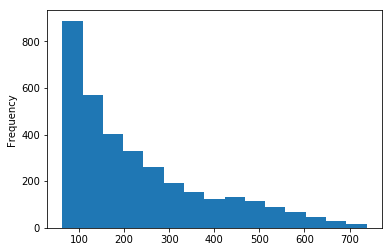

In [20]:
rookie_bandf2['PA'].plot(kind='hist', bins=15)

In [74]:
rookie_bandf2['ab_per_hr'].describe()

count    3409.000000
mean       61.339031
std        46.640916
min         6.700000
25%        29.461538
50%        47.000000
75%        77.000000
max       297.000000
Name: ab_per_hr, dtype: float64

In [77]:
rookie_bandf2['HR'].sum() / rookie_bandf2['PA'].sum()

0.02283738441181514

In [78]:
rookie_bandf2['PA'].sum() / rookie_bandf2['HR'].sum()

43.78785161941051

In [26]:
rookie_bandf2['PA'].sum() / len(rookie_bandf2)

229.22792607802876

In [31]:
rookie_scrape = pd.read_csv('combined.csv')
rookie_scrape.shape

(183, 25)

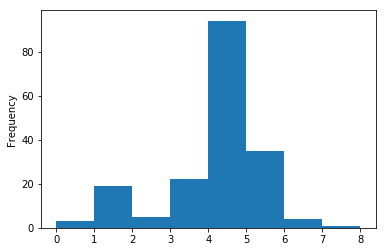

In [36]:
rookie_scrape['PA'].plot(kind='hist', bins=8)

In [55]:
PA_prob = pd.DataFrame(rookie_scrape['PA'].value_counts() / len(rookie_scrape))

In [58]:
PA_prob = PA_prob.reset_index()

In [60]:
PA_prob.columns = ['PA', 'prob_PA']

In [64]:
PA_prob = PA_prob.sort_values('PA')

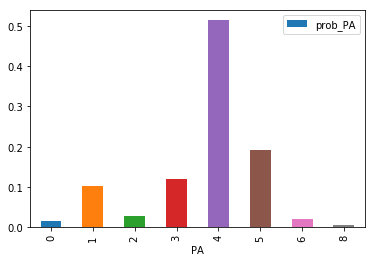

In [68]:
PA_prob.plot(x='PA', y='prob_PA', kind='bar')

In [71]:
146 * 4.5

4.109589041095891

In [ ]:
600/146

In [ ]:
#rookie_bandf2.sample(n=50).describe()

In [13]:
baseball3 = baseball2.dropna(axis='rows')

In [14]:
baseball3.head()

,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
playerID,,,,,,,,,,,,,,,,,,,,,
adamsac01,1946,1,NY1,NL,3,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
breweja01,1946,1,NY1,NL,1,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brownno01,1946,1,PHA,AL,4,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
burpoge01,1946,1,CIN,NL,2,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cardejo01,1946,1,NY1,NL,1,0,0,0,0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
baseball3.shape

(68641, 22)

In [17]:
baseball4 = baseball3[baseball3['PA']>100]

In [20]:
baseball4.sort_values(by='yearID')

,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,PA
playerID,,,,,,,,,,,,,,,,,,,,,
aaronha01,1955,1,ML1,NL,153,602,105,189,37,9,...,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,670.0
paulaca01,1955,1,WS1,AL,115,351,34,105,20,7,...,2.0,3.0,17,43.0,3.0,2.0,0.0,4.0,9.0,377.0
phillbu02,1955,1,DET,AL,95,184,18,43,4,0,...,2.0,1.0,14,20.0,1.0,2.0,1.0,4.0,3.0,206.0
phillda01,1955,1,CLE,AL,43,104,15,31,4,2,...,0.0,2.0,12,10.0,2.0,0.0,0.0,1.0,5.0,119.0
phillda01,1955,2,BAL,AL,83,311,50,93,13,3,...,1.0,2.0,34,38.0,2.0,0.0,2.0,1.0,9.0,350.0
phillja02,1955,1,DET,AL,55,117,15,37,8,2,...,0.0,0.0,10,12.0,0.0,0.0,2.0,2.0,3.0,131.0
piersji01,1955,1,BOS,AL,149,515,68,146,25,5,...,6.0,1.0,67,52.0,7.0,2.0,9.0,6.0,16.0,606.0
popeda01,1955,1,CLE,AL,35,104,17,31,5,0,...,0.0,0.0,12,31.0,0.0,1.0,0.0,1.0,1.0,118.0
popeda01,1955,2,BAL,AL,86,222,21,55,8,4,...,5.0,2.0,16,34.0,3.0,2.0,3.0,2.0,6.0,248.0


In [24]:
fielding = fielding[['playerID', 'POS']]

In [25]:
fielding.head()

,playerID,POS
0,abercda01,SS
1,addybo01,2B
2,addybo01,SS
3,allisar01,2B
4,allisar01,OF


In [34]:
bat_and_field = baseball.join(fielding, on='playerID', how='inner')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [35]:
fielding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140921 entries, 0 to 140920
Data columns (total 2 columns):
playerID    140921 non-null object
POS         140921 non-null object
dtypes: object(2)
memory usage: 2.2+ MB


In [36]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105861 entries, 0 to 105860
Data columns (total 22 columns):
playerID    105861 non-null object
yearID      105861 non-null int64
stint       105861 non-null int64
teamID      105861 non-null object
lgID        105123 non-null object
G           105861 non-null int64
AB          105861 non-null int64
R           105861 non-null int64
H           105861 non-null int64
2B          105861 non-null int64
3B          105861 non-null int64
HR          105861 non-null int64
RBI         105105 non-null float64
SB          103493 non-null float64
CS          82320 non-null float64
BB          105861 non-null int64
SO          103761 non-null float64
IBB         69210 non-null float64
HBP         103044 non-null float64
SH          99792 non-null float64
SF          69757 non-null float64
GIDP        80420 non-null float64
dtypes: float64(9), int64(10), object(3)
memory usage: 17.8+ MB
